In [29]:
import numpy as np
import pandas as pd
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
# from openbb_terminal.sdk import openbb
import openbb
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [24]:
# nq = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]
nifty50 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50")[1]
symbols = nifty50.Symbol.tolist()
symbols = [i+'.NS' for i in symbols] #for getting data on Indian Stocks we need to add .NS to the symbol to retrieve using yfinance
# data = openbb.stocks.ca.hist(
#     symbols, 
#     start_date="2020-01-01", 
#     end_date="2022-12-31"
# )
data = yf.download(symbols, start="2002-01-01", end="2024-11-30", )
# data

[*********************100%***********************]  50 of 50 completed


In [25]:
data = data['Adj Close']

In [30]:
moments = (
    data
    .pct_change()
    .describe()
    .T[["mean", "std"]]
    .rename(columns={"mean": "returns", "std": "vol"})
) * [252, np.sqrt(252)]
moments

,returns,vol
Ticker,,
ADANIENT.NS,0.791040,2.472136
ADANIPORTS.NS,0.205292,0.423579
APOLLOHOSP.NS,0.280118,0.350278
ASIANPAINT.NS,0.261775,0.262921
AXISBANK.NS,0.335263,0.414863
BAJAJ-AUTO.NS,0.264057,0.316180
BAJAJFINSV.NS,0.220096,0.440803
BAJFINANCE.NS,0.831167,2.165663
BEL.NS,1.715800,6.820491


In [31]:
km = KMedoids(n_clusters=5).fit(moments)
labels = km.labels_
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]

Text(0, 0.5, 'Ann. Vol.')

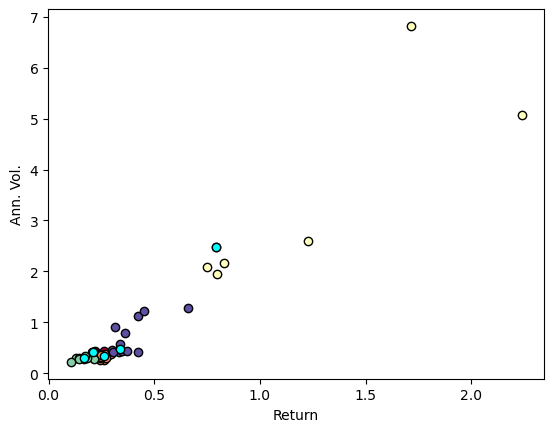

In [32]:
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = moments[class_member_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.plot(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
)
plt.xlabel("Return")
plt.ylabel("Ann. Vol.")